# 1. Introduction
***
With the emergence of self-driving cars in the recent years, one can't help but think that the recognition of traffic (or road) signs is one of the most important condition for a self-driving car to drive itself. For instance, if there is an exit that the car needs to take to get you to your destination, it should be able to look at the exit sign and slow down enough to take the lane.

In this work, I will try to create a neural network (NN) which will lead to a classification model where given an image of a road sign, the model will be able to predict accurately what the sign means. But before that, since we know that this is a classification problem and we have the target variable defined, it will be worth our time to check the accuracy of some other, more traditional, classification models as well.

The data was obtained from [Kaggle](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign). The data is that of German traffic (road) signs. There are around 43 classes with more than 50,000 images divided among them. Considering that there is *very* little margin for error since the cars will be on the road, driving themselves (potentially carrying passengers), we will look to obtain a very high accuracy (>95%).


# 2. Data Wrangling
***
### 2.1 Import the necessary modules

In [16]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

from PIL import Image

import warnings
warnings.filterwarnings("ignore")

### 2.2 Import the data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
meta = pd.read_csv("Meta.csv")

In [9]:
train.head(3)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png


In [4]:
test.head(3)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png


It is clear that the train and test dataframes have a column with defined paths, and these paths are for images contained in the train and test folders respectively. 

In [10]:
meta.describe()

,ClassId,ShapeId,ColorId
count,43.000000,43.000000,43.000000
mean,21.000000,0.790698,0.511628
std,12.556539,0.803508,0.935340
min,0.000000,0.000000,0.000000
25%,10.500000,0.000000,0.000000
50%,21.000000,1.000000,0.000000
75%,31.500000,1.000000,1.000000
max,42.000000,4.000000,3.000000


# 3. Exploratory Data Analysis
***

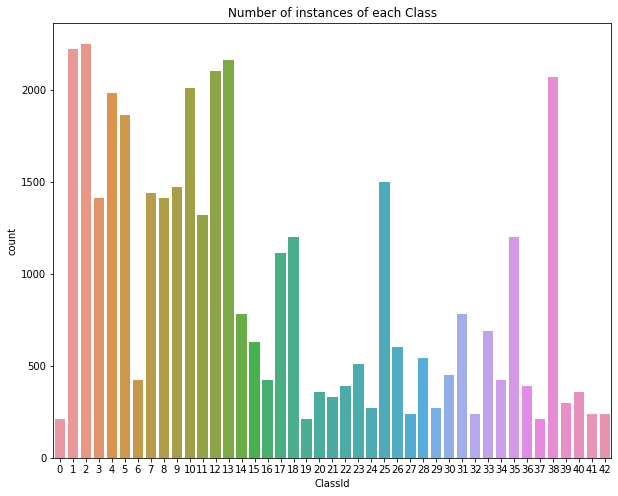

In [15]:
# Check the counts of each class
plt.figure(figsize=(10,8))
sns.countplot(train.ClassId)
plt.title("Number of instances of each Class")
plt.show()

It's pretty clear that the distribution of the target variable (since the class ID is our target) is a little skewed in the training data. However, the distribution is still decent and probably won't affect the ML model.

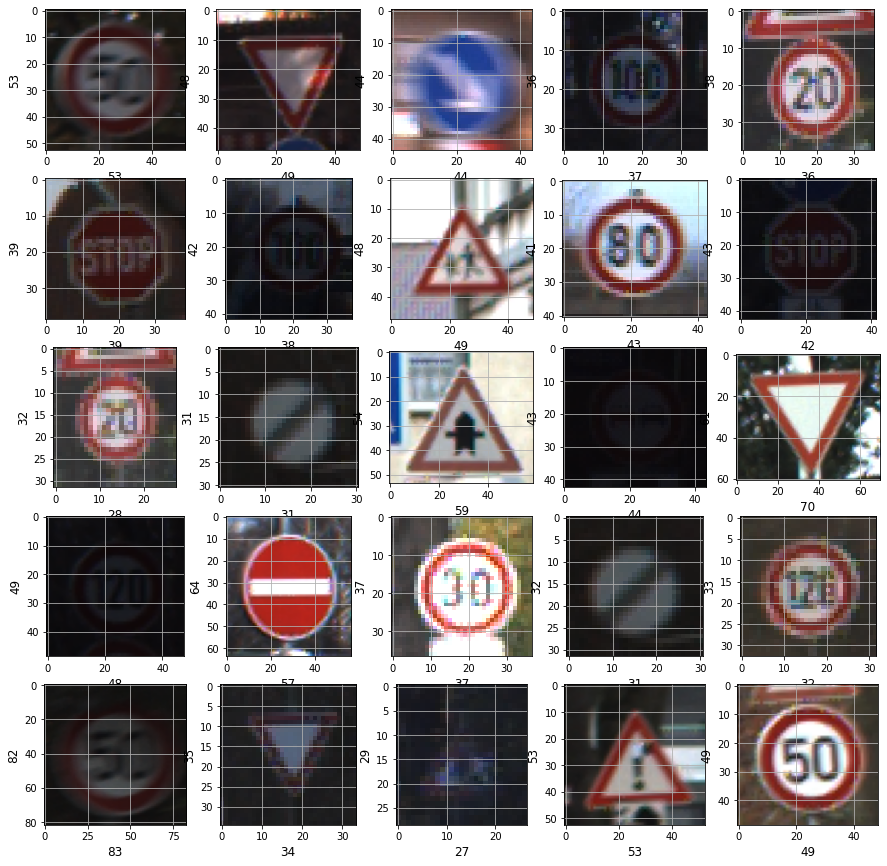

In [28]:
# set the path for train and test images
train_path = "./Train"
test_path = "./Test"

# visualize 25 random images from the train folder
imgs = test["Path"].values

plt.figure(figsize=(15,15))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = './' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 12)
    plt.ylabel(rand_img.shape[0], fontsize = 12)

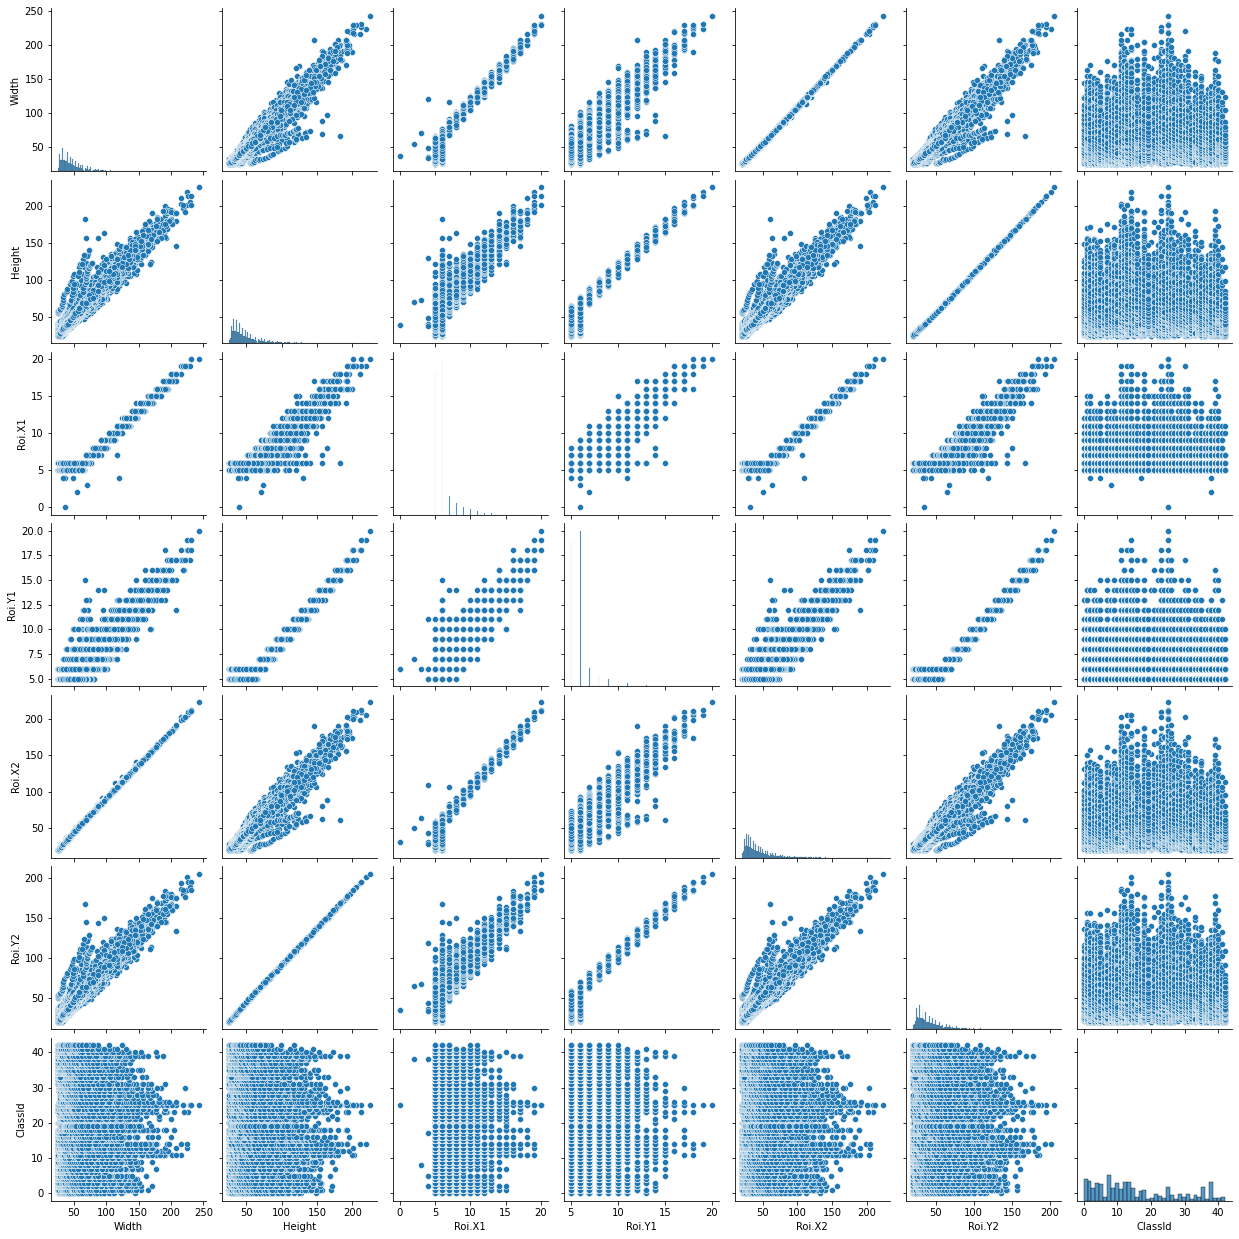

In [30]:
# Plot a pairplot
sns.pairplot(train)
plt.show()

`ROI` in the dataframes is just the region of interest. Let's now see the correlation between the features and the labels (if any present) and visualize it with the help of a heatmap. This will help in feature selection at a later time, if needed.

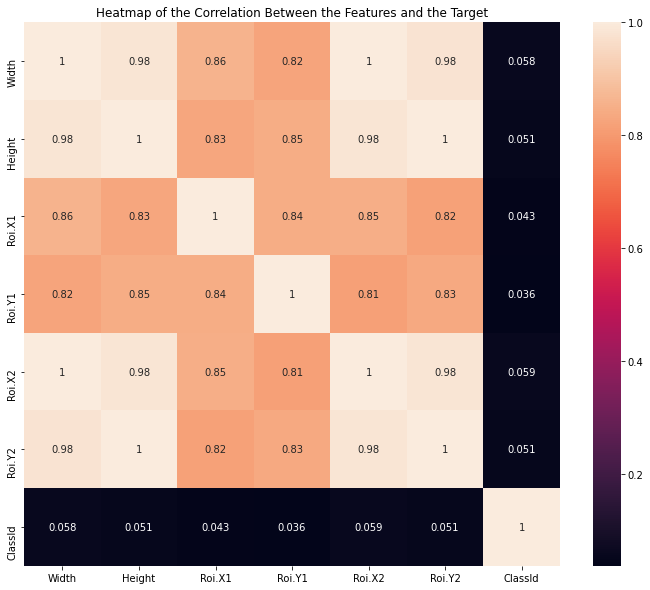

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True)
plt.title("Heatmap of the Correlation Between the Features and the Target")
plt.show()

**As expected**, the `Classid` field is not correlated with the features. This is in accordance with the fact that the height, width and region of interest of the images do not determine the Class of the road sign. Let's move on to the next part: Preprocessing the data.


# 3. Pre-processing
***

In [7]:
folders_train = [i for i in os.listdir(train_path) if not i.startswith('.')]

# set the labels (classes) and features
features = []
labels = []

# Access each folder and iterate over the images
for folder in folders_train:
    # set the path
    path = os.path.join(train_path, folder)
    # read each image file and resize it to 30*30 array
    images = os.listdir(path)
    for image in images:
        a = Image.open(path + '/' + image)
        a = a.resize((30,30))
        a = np.array(a)
        features.append(a)
        labels.append(folder)
        
# Each folder is the label and the images are the features. All images correspond to the same label.

In [8]:
# Convert the lists (features and labels) into numpy arrays
feat = np.array(features)
lab = np.array(labels)

# check the shape of the arrays
print(feat.shape, lab.shape)

(39209, 30, 30, 3) (39209,)
